Import Dependencies

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Visualization style
sns.set(style="darkgrid")


Load the Dataset

In [87]:
# Load COVID-19 dataset
df = pd.read_csv("covid_19_data.csv")

# Preview data
df.head(5)

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


Data Cleaning

In [88]:
# Check missing values
print(df.isnull().sum())

# Fill missing values with 0
df.fillna(0, inplace=True)

# Convert Date column to datetime
#df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Aggregate global data
global_data = df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()
global_data.head()


SNo                0
Date               0
State          78103
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


/tmp/ipython-input-3350593048.py:9: UserWarning:

Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



,Date,Confirmed,Recovered,Deaths
0,2020-01-22,557,30,17
1,2020-01-23,1097,60,34
2,2020-01-24,941,39,26
3,2020-01-25,1437,42,42
4,2020-01-26,2118,56,56


Global Trends Visualization

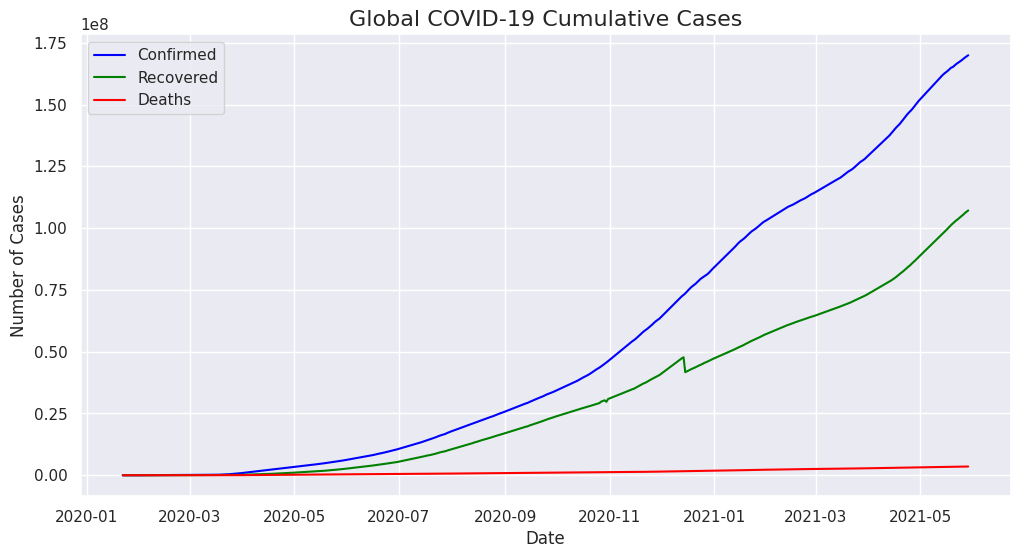

In [89]:
plt.figure(figsize=(12,6))
plt.plot(global_data['Date'], global_data['Confirmed'], label="Confirmed", color='blue')
plt.plot(global_data['Date'], global_data['Recovered'], label="Recovered", color='green')
plt.plot(global_data['Date'], global_data['Deaths'], label="Deaths", color='red')

plt.title("Global COVID-19 Cumulative Cases", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


Country-wise Analysis

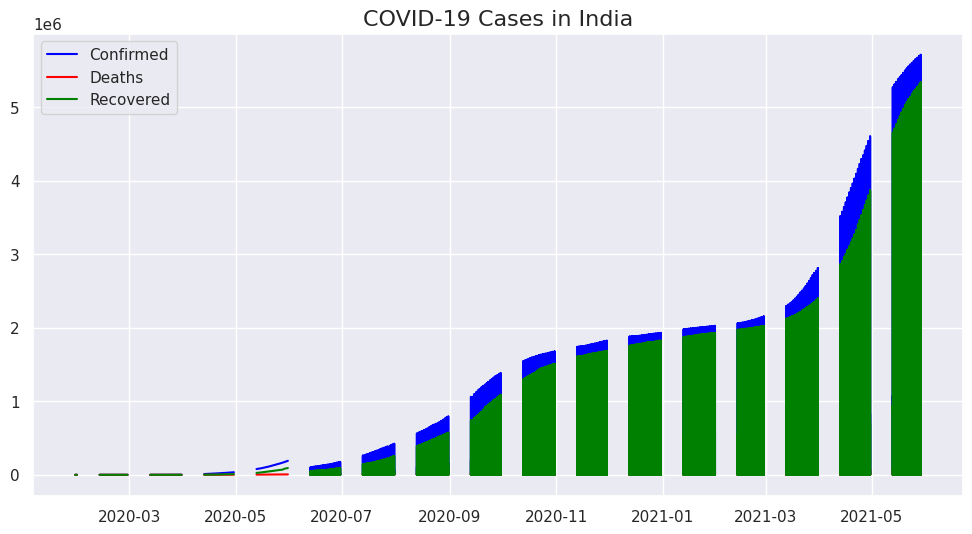

In [90]:
# Example: India
country = "India"
country_data = df[df['Country'] == country]

plt.figure(figsize=(12,6))
plt.plot(country_data['Date'], country_data['Confirmed'], label="Confirmed", color='blue')
plt.plot(country_data['Date'], country_data['Deaths'], label="Deaths", color='red')
plt.plot(country_data['Date'], country_data['Recovered'], label="Recovered", color='green')

plt.title(f"COVID-19 Cases in {country}", fontsize=16)
plt.legend()
plt.show()


Interactive Country Comparison


In [91]:
top_countries = ['India', 'US', 'Canada', 'Italy', 'Spain']
filtered_data = df[df['Country'].isin(top_countries)]

fig = px.line(filtered_data,
              x="Date", y="Confirmed", color="Country",
              title="COVID-19 Confirmed Cases Comparison")
fig.show()


Heatmap: Spread Across Countries

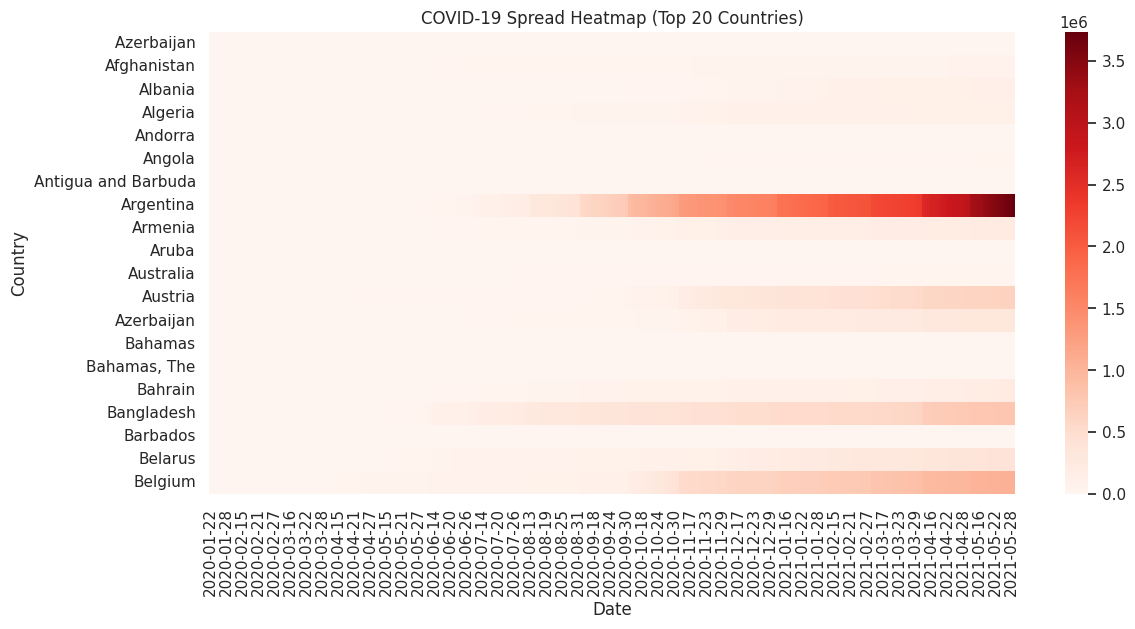

In [92]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date # Convert the datetime column to date only:


pivot = df.pivot_table(values="Confirmed", index="Country", columns="Date", aggfunc='sum')
plt.figure(figsize=(13,6))
sns.heatmap(pivot.fillna(0).iloc[:20,:], cmap="Reds")
plt.title("COVID-19 Spread Heatmap (Top 20 Countries)")
plt.show()


## Insights

- Global cases surged rapidly after March 2020, with multiple peaks.
- The US and India showed the highest confirmed cases.
- Recovery rates improved over time, but mortality trends varied across regions.